In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'항일+민족', '폭력(무장)', '국제주의+세계적', '공화정 국가 수립 + 개혁적', '비폭력(비무장)+평화'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['항일+민족', '폭력(무장)', '국제주의+세계적', '공화정 국가 수립 + 개혁적', '비폭력(비무장)+평화']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

항일+민족
['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG', '자유/NNG', '일본인/NNG', '평화/NNG', '하늘/NNG', '정부/NNG', '마음/NNG', '조선인/NNG', '행동/NNG', '국민/NNG', '생각/NNG', '한국/NNP', '정의/NNG', '때/NNG', '가운데/NNG', '만세/IC', '피/NNG', '회의/NNG', '아래/NNG', '역사/NNG', '백성/NNG', '동안/NNG', '자신/NNG', '정신/NNG', '운동/NNG', '앞/NNG', '소리/NNG', '미국/NNP', '나/NP', '원수/NNG', '대표/NNG', '시대/NNG', '이번/NNG', '과거/NNG', '생명/NNG', '이상/NNG', '세상/NNG', '전쟁/NNG', '동양/NNG', '선언/NNG', '후/IC', '힘/NNG', '뜻/NNG', '속/NNG', '형제/NNG', '사실/MAG', '강화/NNG', '곳/NNG', '문제/NNG', '요구/NNG', '중국/NNP', '왜놈/NNG', '교육/NNG', '정치/NNG', '기회/NNG', '시작/NNG', '적/NNG', '단체/NNG', '신문/NNG', '오늘/NNG', '인도/NNP', '파리/NNP', '도리/NNG', '단/MAJ', '귀국/NNG', '조약/NNG', '사이/NNG', '목적/NNG', '황제/NNG', '임시/NNG', '인류/NNG', '건국/NNG', '노예/NNG', '기관/NNG', '학생/NNG', '몸/NNG', '조직/NNG', '안/MAG', '필요/NNG', '위원/NNG', '대한민국/NNP', '관계/NNG', '병합/NNG', '이후/NNG', '고통/NNG', '손/NNG', '러시아/NNP', '국가/NNG', '문명/NNG', '학교/NNG', '인민/NNG', '독립운동/

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/text/대한민국임시정부자료집.txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

대한민국임시헌법
우리 대한민국은 우리나라가 독립국이라는 사실과 우리 민족이 자주민이라는 사실을 선언하였다 이것을 세계 여러 나라에 알려서 인류 평등의 대의를 밝혔으며 이것을 자손 만대에 알려서 그들이 민족 자존의 정당한 권리를 영원히 누릴 수 있도록 하였다
반만년 역사의 권위에 의지하고 이천만 민중의 정성된 마음을 모아서 민족의 영원한 자유 발전을 위하여 조직된 대한민국의 인민을 대표한 임시의정원은 국민들의 뜻에 따라 월 일 발표한 개조의 임시헌장을 바탕으로 본 임시헌법을 제정하였다 이로써 공정한 도리를 밝히고 공익을 증진하며 국방 및 내치를 준비하고 정부의 기초를 굳건히 하는 보장이 되게 하노라
제 장 강 령
제 조 대한민국은 대한인민으로 조직함
제 조 대한민국의 주권은 대한 인민 전체에게 있음
제 조 대한민국의 강토는 구 대한제국의 판도로 정함
제 조 대한민국의 인민은 일체 평등함
제 조 대한민국의 입법권은 의정원이 행정권은 국무원이 사법권은 법원이 각각 행사함
제 조 대한민국의 주권 행사는 헌법 범위 내에서 임시대통령에게 위임함
제 조 대한민국은 구황실을 우대함
제 장 인민의 권리와 의무
제 조 대한민국의 인민은 법률 범위 내에서 아래 각항의 자유를 가짐
신교의 자유
재산의 보유와 영업의 자유
언론 저작출판 집회 결사의 자유
서신 비밀의 자유
거주 이전의 자유
제 조 대한민국의 인민은 법률에 의하여 아래 각항의 권리를 가짐
법률에 의하지 않고서는 체포 감금 신문 처벌을 받지 않을 권리
법률에 의하지 않고서는 가택의 침입 또는 수색을 당하지 않을 권리
선거권 및 피선거권
입법부에 청원할 수 있는 권리
법원에 소송하여 재판을 받을 수 있는 권리
행정관서에 소원할 수 있는 권리
문무의 관리에 임명될 수 있는 권리 또는 공무를 담당할 수 있는 권리
제 조 대한민국의 인민은 법률에 의하여 아래 각항의 의무를 가짐
납세의 의무
병역에 복무하는 의무
보통교육을 받을 의무
제 장 임시대통령
제 조 임시대통령은 국가를 대표하고 정무를 총람하며 법률을 공포함
제 조 임시대

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_56900\3333547382.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['대한민국/NNP', '임시/NNG', '헌법/NNG', '대한민국/NNP', '우리나라/NNG', '독립국/NNG', '사실/NNG', '민족/NNG', '민/NNG', '사실/NNG', '선언/NNG', '것/NNB', '세계/NNG', '나라/NNG', '인류/NNG', '평등/NNG', '대의/NNG', '자손/NNG', '만대/NNG', '민족/NNG']
['대한민국/NNP', '임시/NNG', '헌법/NNG', '우리/NP', '대한민국/NNP', '은/JX', '우리나라/NNG', '가/JKS', '독립국/NNG', '이/VCP', '라는/ETM', '사실/NNG', '과/JC', '우리/NP', '민족/NNG', '이/JKS', '자주/MAG', '민/NNG', '이/VCP', '라는/ETM']
{'우리/NP', '째/XSN', '동일/NNG', '새롭/VA-I', '외/NNB', '바래/VV', '은/ETM', '이여/JKV', '검사/NNG', '끝/NNG', '항목/NNG', '이천만/NR', '대/XPN', '몇몇/MM', '어질/VA', '이/XSN', '이익/NNG', '욕/NNG', '질문서/NNG', '상/NNG', '날/NNG', '조/NNG', '다가/EC', '로부터/JKB', '개년/NNB', '협약/NNG', '보/VV', '지키/VV', '외무/NNG', '두/MM', '이행/NNG', '습성/NNG', '찾아보/VV', '제정/NNG', '평화/NNG', '백/NR', '동포/NNG', '구/XPN', '을/JKO', '가지/VV', '각지/NNG', '전문/NNG', '부터/JX', '주/VX', '결의/NNG', '대답/NNG', '무도/XR', '구하/VV', '중국/NNP', '정무/NNG', '연령/NNG', '용납/NNG', '속박/NNG', '이/MM', '나/NP', '건국/NNG', '아니/VCN', '공약/NNG', '지출/NNG', '관/NNG', '이/JKC', '공포일/NNP', '독립/NNG'

<Axes: xlabel='n', ylabel='word'>

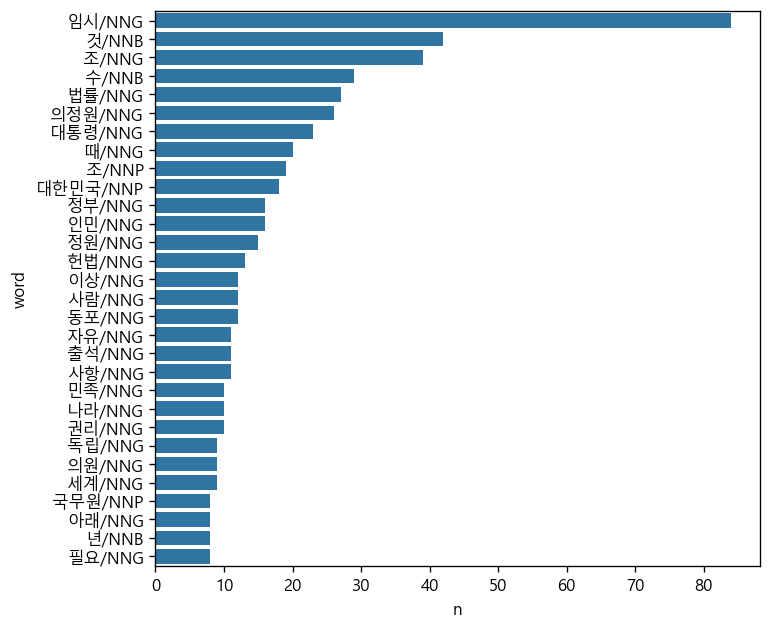

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

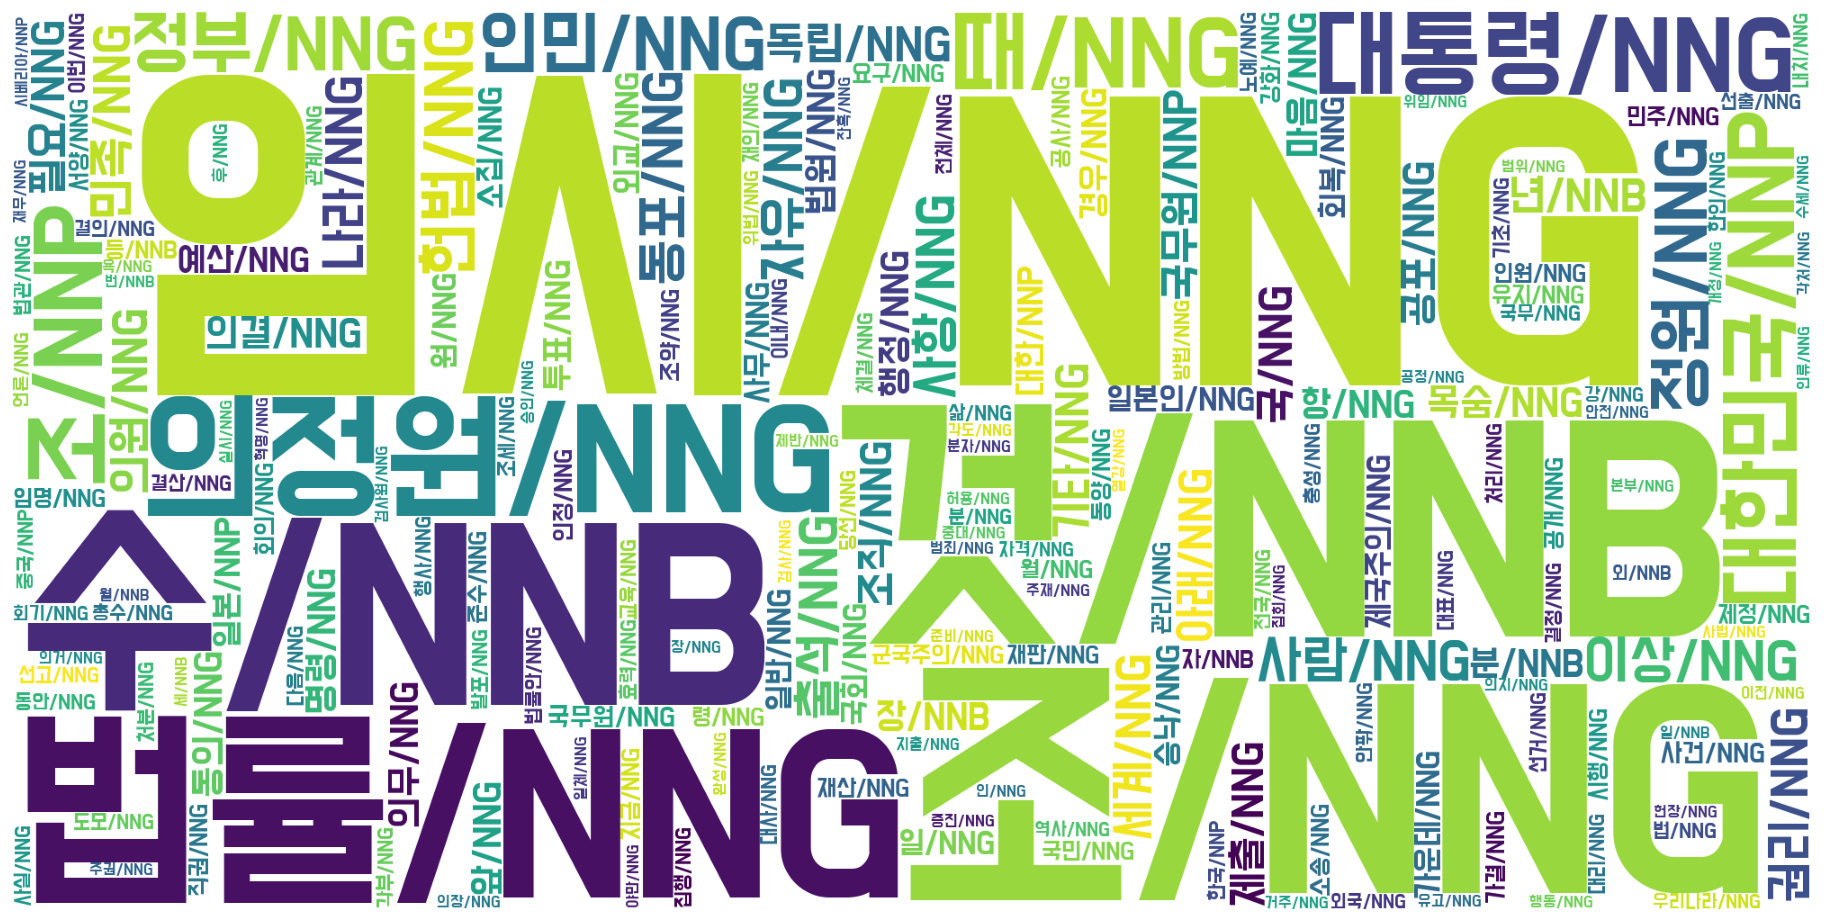

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...  166  \
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                 167  168  169  170  171  172  173  174  175  
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 176 columns]


C:\Users\wjh20\AppData\Local\Temp\ipykernel_56900\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


                   0    1    2     3    4    5    6    7    8    9  ...  166  \
항일+민족            2.0  5.0  9.0  27.0  5.0  2.0  3.0  4.0  3.0  5.0  ...  1.0   
폭력(무장)           0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         0.0  0.0  0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
공화정 국가 수립 + 개혁적  0.0  0.0  1.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
비폭력(비무장)+평화      0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   

                  167  168  169  170  171  172   173   174  175  
항일+민족            16.0  8.0  8.0  1.0  9.0  7.0  12.0  11.0  8.0  
폭력(무장)            0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0  0.0  
국제주의+세계적          1.0  1.0  1.0  0.0  1.0  0.0   2.0   0.0  0.0  
공화정 국가 수립 + 개혁적   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  1.0  
비폭력(비무장)+평화       0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  

[5 rows x 176 columns]


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_56900\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0         1         2         3         4         5  \
항일+민족            0.178159  0.445398  0.801717  2.405150  0.445398  0.178159   
폭력(무장)           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
국제주의+세계적         0.000000  0.000000  0.000000  0.000000  0.839751  0.000000   
공화정 국가 수립 + 개혁적  0.000000  0.000000  2.867899  2.867899  0.000000  0.000000   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                        6         7         8         9  ...      166  \
항일+민족            0.267239  0.356319  0.267239  0.445398  ...  0.08908   
폭력(무장)           0.000000  0.000000  0.000000  0.000000  ...  0.00000   
국제주의+세계적         0.000000  0.000000  0.000000  0.000000  ...  0.00000   
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  0.000000  ...  0.00000   
비폭력(비무장)+평화      0.000000  0.000000  3.561046  0.000000  ...  0.00000   

                      167       168       169      170       171       172  \
항일+민족   

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/대한민국임시정부자료집.csv")

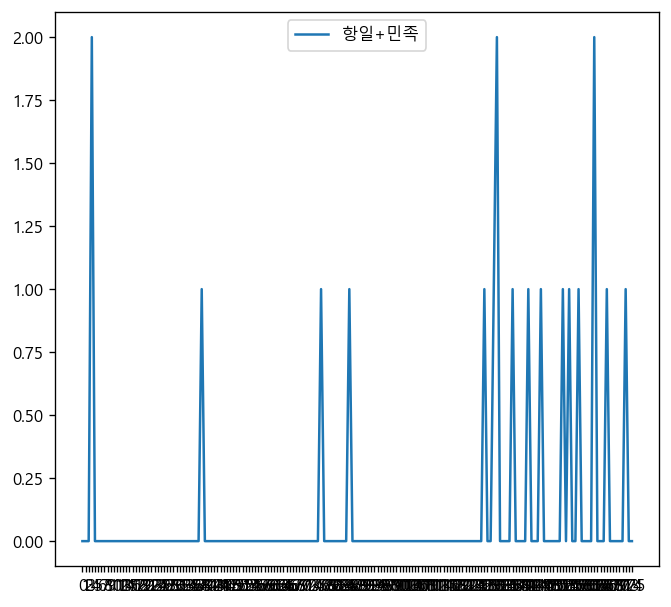

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

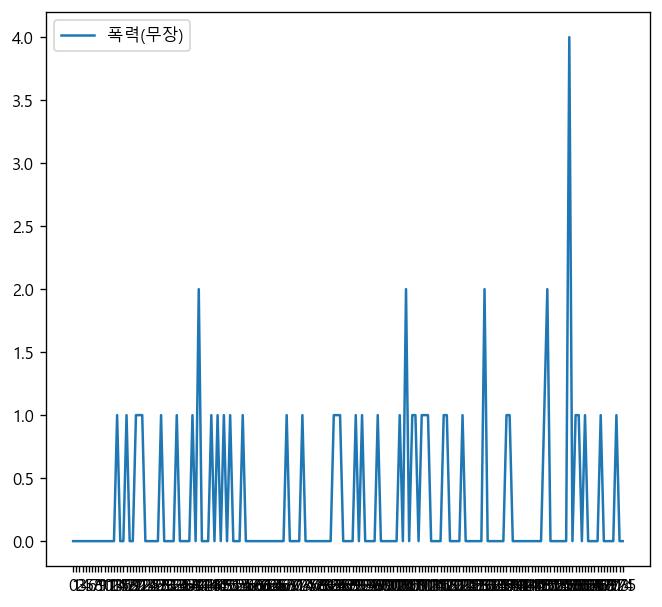

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

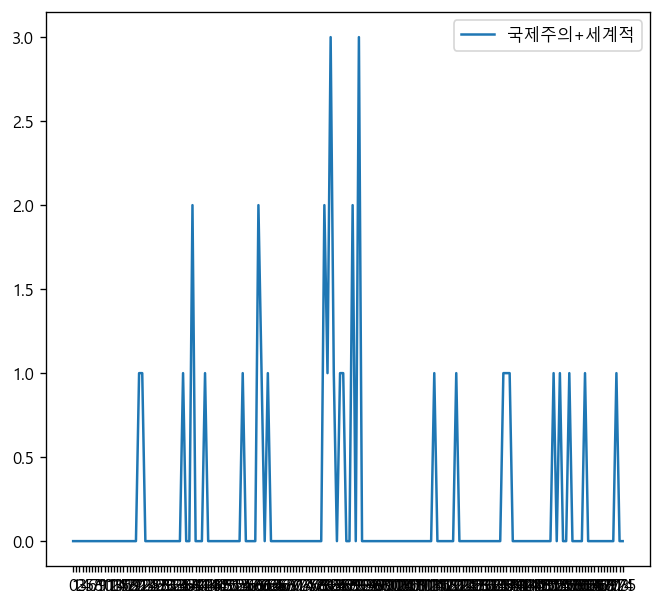

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

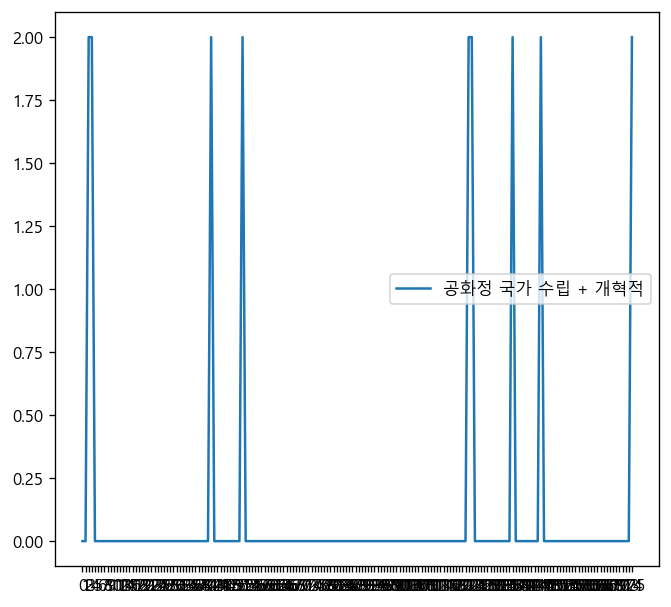

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

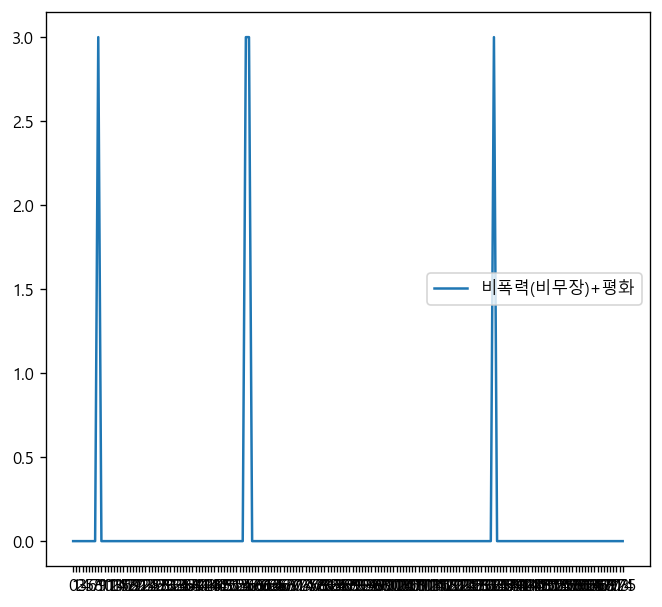

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

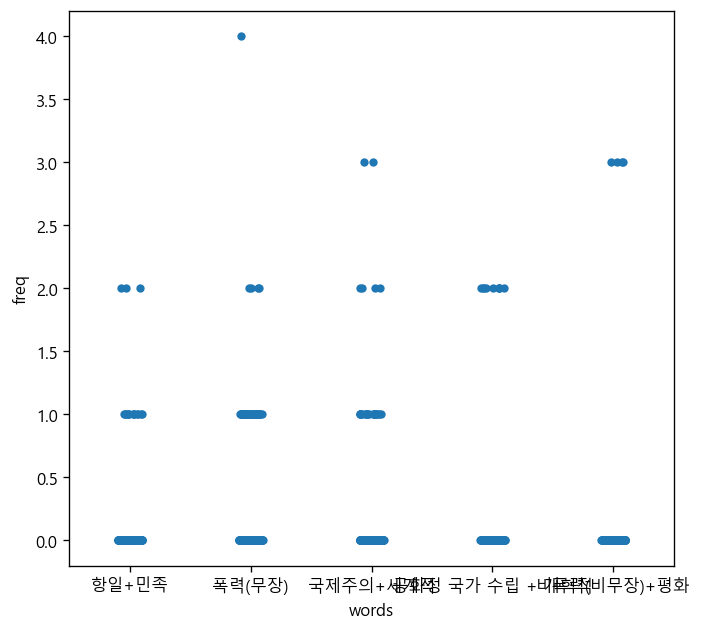

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

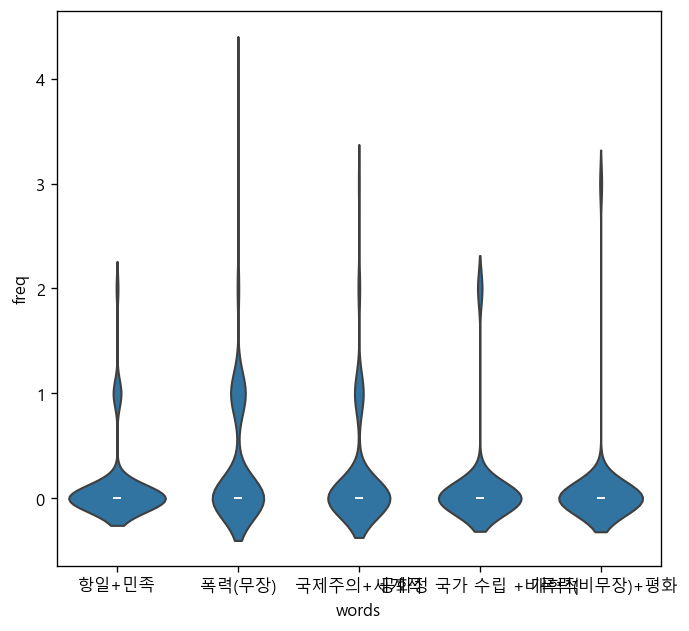

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

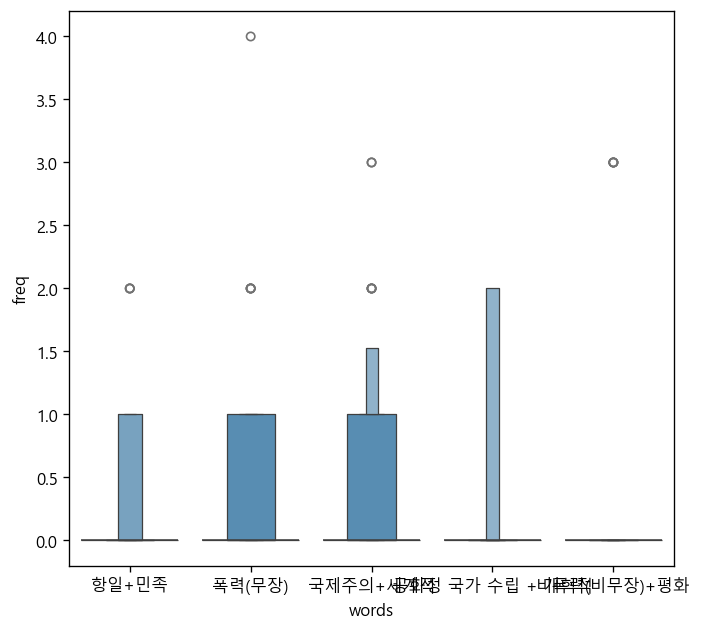

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)